![SegmentLocal](../../assets/images/Logo2.png)

# Data Cleaning 

 *ACC online course, Institute of Cognitive Science, University of Osnabrueck* 

## Prerequisites
For this chapter, you should be familiar with the following concepts and techniques:
* Basic Python programming
* Working with Pandas
* Statistical Analysis
* Statistical plotting

### Eye tracking data

##### The Osnabrueck-Hamburg eye tracking data set

In this chapter we will work with a collection of eye tracking data from several studies conducted at the Institute of Cognitive Science, University of Osnabrueck and at the University Medical Center Hamburg-Eppendorf. 

Take a look at the paper for more information on the dataset and the individual studies: <br>
[ Wilming, N. et al. (2017). An extensive dataset of eye movements during viewing of complex images. Sci. Data 4:160126.](https://doi.org/10.1038/sdata.2016.126)

If you are interested in the topic, the dataset is openly distributed and can be downloaded [here](https://datadryad.org/stash/dataset/doi:10.5061/dryad.9pf75). <br> 

We have already downloaded the relevant data for this exercise and it it stored in the **./et_data** folder.

<div class="alert alert-block alert-warning">
<b>Note:</b> The data that we will use in this chapter is already preprocessed; this means that
    instead of raw gaze data it contains the coordinates of fixation poitns.
</div>


## Loading the data
As usual, the first step is to load the data and to get an idea of how the data looks like before we start doing any analysis on it. It is always a good idea to spend some time familiarizing with the data, this will especially turn out to be helpful when it comes to checking whether there are any mistakes in the subsequent analysis. Take a look at the meta data and the columns of the dataframe.

In [1]:
# Python packages required for this chapter
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import *
import urllib
from io import BytesIO
from PIL import Image

In [2]:
df_url = 'https://raw.githubusercontent.com/ashimakeshava/ACC_SS2021/main/Tutorials/Day-03/et_data/et_data_handedness.csv'
meta_url = 'https://raw.githubusercontent.com/ashimakeshava/ACC_SS2021/main/Tutorials/Day-03/et_data/meta_data.csv'
df = pd.read_csv(df_url)
meta = pd.read_csv(meta_url)

In [3]:
# Take a look at the columns of the dataframe
df.head()

,SUBJECTINDEX,category,dataset_nr,delay,end,eye,filenumber,fix,handedness,image,mirror,pupil,spatial_filter,start,trial,x,y
0,1,24,21,0,634,1,22,1,0,22,1,762.14110,2,512,1,604.39170,329.15050
1,1,24,21,0,1138,1,22,2,0,22,1,750.29877,2,672,1,750.34753,260.32580
2,1,24,21,0,1550,1,22,3,0,22,1,767.66940,2,1184,1,391.17563,161.79257
3,1,24,21,0,1990,1,22,4,0,22,1,878.96545,2,1600,1,932.51666,317.48633
4,1,24,21,0,2386,1,22,5,0,22,1,908.82214,2,2012,1,957.90454,377.89830


In [4]:
# get more info on df columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83834 entries, 0 to 83833
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBJECTINDEX    83834 non-null  int64  
 1   category        83834 non-null  int64  
 2   dataset_nr      83834 non-null  int64  
 3   delay           83834 non-null  int64  
 4   end             83834 non-null  int64  
 5   eye             83834 non-null  int64  
 6   filenumber      83834 non-null  int64  
 7   fix             83834 non-null  int64  
 8   handedness      83834 non-null  int64  
 9   image           83834 non-null  int64  
 10  mirror          83834 non-null  int64  
 11  pupil           83834 non-null  float64
 12  spatial_filter  83834 non-null  int64  
 13  start           83834 non-null  int64  
 14  trial           83834 non-null  int64  
 15  x               83834 non-null  float64
 16  y               83834 non-null  float64
dtypes: float64(3), int64(14)
memory

The relevant columns and their descriptions are given below: <br>
`SUBJECTINDEX` : subject index<br>

`category` : category of stimuli (7: Natural, 8: Urban, 24: Natural_HP, 25: Urban_HP, 26: Natural_LP, 27: Urban_LP) <br> 

`spatial_filter` : filter applied to images (1: None, 2: High_Pass, 3: Low_Pass)

`fix`  :  fixation number<br>  

`handedness`: handedness of subject (0: right handed, 1: left handed) <br>

`image`:  stimuli image used in the trial     <br>  

`mirror` :  is stimuli mirrored (0: no, 1: yes)   <br>

`pupil`  :  pupil size  <br>  

`start` :  time of start of fixation<br>

`end ` :   time of end of fixation<br>

`trial` :  trial number<br>

`x`   :  horizontal position of fixation in screen coordinate     <br> 

`y ` :   vertical position of fixation in screen coordinate    <br> 


In [5]:
# TODO: Using value_counts, check the number of rows for mirror condition and handedness conditions
display(df.mirror.value_counts())
display(df.handedness.value_counts())

0    41956
1    41878
Name: mirror, dtype: int64

0    55517
1    28317
Name: handedness, dtype: int64

In [6]:
# TODO: Check number of unique subjects per handedness condition
df.groupby('handedness').SUBJECTINDEX.nunique()

handedness
0    31
1    17
Name: SUBJECTINDEX, dtype: int64

## Some data wrangling!

1. Add a column ```str_category``` to the dataframe that contains the string value of each category. The string values of the columns are given above.
2. Map the numeric values for columns `handedness`, `mirror`, `spatial_filter` to their string values as given above

In [7]:
# TODO: 
df.loc[:, "str_category"] = df["category"].replace({
    7:"Natural", 
    8:"Urban",
    24:"Natural_HP", 
    25:"Urban_HP",
    26:'Natural_LP',
    27:'Urban_LP'
})

df.loc[:, "handedness"] = df["handedness"].replace({
    1:"left", 
    0:"right",
})

df.loc[:, "mirror"] = df["mirror"].replace({
    1:"yes", 
    0:"no",
})

df.loc[:, "spatial_filter"] = df["spatial_filter"].replace({
    1:"None", 
    2:"High Pass",
    3:"Low Pass"
})

3. Count number of fixations per category

In [8]:
# TODO: How many fixations are there for each category?
fix_count = df.groupby("str_category")['fix'].agg("count")
print("Fixations per category before data cleaning:")
print(fix_count)

Fixations per category before data cleaning:
str_category
Natural       15258
Natural_HP    14472
Natural_LP    13498
Urban         14286
Urban_HP      14006
Urban_LP      12314
Name: fix, dtype: int64


4. Remove any rows that have an onset time before 0 sec and an end time after 6 sec. Since measurements lasted for 6 seconds, those rows are erronous and have to be deleted. Save the new dataframe as `df_cleaned`

In [9]:
# TODO: Remove fixations which have an on-/offset outside the interval [0 - 6 sec]
df_cleaned = df[(df.start>=0) & (df.start<6000) & (df.end<=6000)]

5. Add a column called ```duration``` and compute the duration of each fixation using the `start` and `end` columns

In [10]:
# TODO: Add a column "duration"
df_cleaned.loc[:, "duration"] = df_cleaned.loc[:, "end"] - df_cleaned.loc[:, "start"]

C:\Users\lonesome\anaconda3\envs\acc_conda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\lonesome\anaconda3\envs\acc_conda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


6. In order to filter out fixation durations which are outliers, we will use median absolute deviation based outlier detection.

Take a look at the function ```mad_outlier(data, threshold)``` and use this function to find rows where fixation durations which have a modified z-value of more than 3.5. The funtion returns 0s and 1s. 0 for fix_duration is not an outlier and 1 where duration is outlier. Create another column `is_outlier` to save the output of the function.

If you are interested, you can read about [why we are using median absolute deviation instead of standard z-transformation](https://core.ac.uk/display/17349316) and about [how to calculate modified z-scores](https://www.pdf-archive.com/2016/07/29/outlier-methods-external/outlier-methods-external.pdf).
Tipp: The function ```mad_outlier(data, threshold)```returns a mask, [refresh your knowledge about masking](https://pythonhealthcare.org/2018/04/07/30-using-masks-to-filter-data-and-perform-search-and-replace-in-numpy-and-pandas/) if necessary.

In [11]:
def mad_outlier(data, threshold=3.5):
    """ Median Absolute deviation based outlier detection.
    Returns a booelan mask (True if z > threshold, else False)."""
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_score = 0.6745 * (data - median) / mad

    return modified_z_score > threshold

# TODO: Remove outliers with respect to fixation duration
df_cleaned.loc[:, 'is_outlier'] = mad_outlier(df_cleaned.duration)

df_cleaned.is_outlier.value_counts()

C:\Users\lonesome\anaconda3\envs\acc_conda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\lonesome\anaconda3\envs\acc_conda\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


False    80245
True      3088
Name: is_outlier, dtype: int64

7. Now repeat the first step - calculating the number of fixations per category - and check how many data points have been removed for each category.

In [12]:
# TODO: How many fixations per category are left after cleaning the data?
fix_count = df_cleaned.groupby("str_category")['fix'].agg("count")
print("Fixations per category after data cleaning:")
print(fix_count)

Fixations per category after data cleaning:
str_category
Natural       15155
Natural_HP    14399
Natural_LP    13421
Urban         14194
Urban_HP      13911
Urban_LP      12253
Name: fix, dtype: int64


8. Now drop the following columns that we won't need for further analysis: `dataset_nr`, `pupil`, `eye`, `delay`

In [13]:
df_cleaned = df_cleaned.drop(columns=['dataset_nr', 'eye', 'pupil', 'delay'])

9. create a column `log_duration` which is the log of the fixation duration 

In [14]:
df_cleaned['log_duration'] = np.log(df_cleaned['duration'])

In [15]:
# Now that we've cleaned the data, take a look at the head of the cleaned data frame again.
# Check if previous steps were correct
df_cleaned.head()

,SUBJECTINDEX,category,end,filenumber,fix,handedness,image,mirror,spatial_filter,start,trial,x,y,str_category,duration,is_outlier,log_duration
0,1,24,634,22,1,right,22,yes,High Pass,512,1,604.39170,329.15050,Natural_HP,122,False,4.804021
1,1,24,1138,22,2,right,22,yes,High Pass,672,1,750.34753,260.32580,Natural_HP,466,False,6.144186
2,1,24,1550,22,3,right,22,yes,High Pass,1184,1,391.17563,161.79257,Natural_HP,366,False,5.902633
3,1,24,1990,22,4,right,22,yes,High Pass,1600,1,932.51666,317.48633,Natural_HP,390,False,5.966147
4,1,24,2386,22,5,right,22,yes,High Pass,2012,1,957.90454,377.89830,Natural_HP,374,False,5.924256


## Checking data distribution

<div class="alert alert-block alert-info">
 <b>Why log-transforming the data?:</b>   If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution. In this case, the log-transformation does remove or reduce skewness. <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/">Here</a> you can read more about log-transformation and its problems.</div>
      
<div class="alert alert-block alert-warning">  
For the subsequent analysis we will <b>not</b> use the log-transformed fixation durations, the last part of this exercise is just supposed to be an illustration of what happens to the data when performing a log-transformation.  
</div>

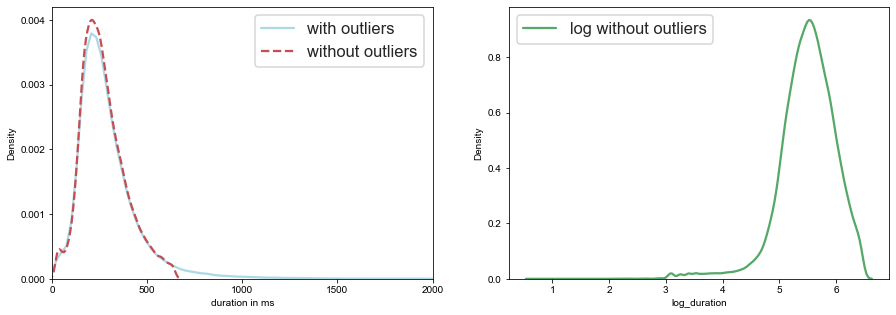

In [16]:
# TODO: Visualize the data distribution of fixation durations with and without outliers and the log_durations without outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.set(style='ticks', context='talk',)
sns.kdeplot(df_cleaned["duration"], label='with outliers', color='lightblue', ax=ax[0])
sns.kdeplot(df_cleaned.loc[df_cleaned.is_outlier==0, 'duration'], label='without outliers',color='r', ls='--', ax=ax[0])
sns.kdeplot(df_cleaned.loc[df_cleaned.is_outlier==0, 'log_duration'], label='log without outliers',color='g', ax=ax[1])
ax[0].legend()
ax[1].legend()
ax[0].set(xlim=(0,2000), xlabel='duration in ms')
plt.show()

## Effect of stimulus category, spatial_filter and mirroring on fixations

In the following, we want to investigate if the category of the visual stimulus has an effect on the number and the duration of fixations. First, we will approach this question visually, after that we will formulate and test our hypothesis statistically.

Look at [`agg()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html) to see how to aggregate multiple columns at once

In [25]:
# TODO: Calculate mean number of fixations per subject and category remember to remove the outlier fixation durations first!!!

fix_category = (
    df_cleaned
    .query('is_outlier==0')
   .groupby(["SUBJECTINDEX", 'trial', 'category'])
    .agg({'fix':'count', 'duration':'mean'})
    .reset_index()
    .groupby(["SUBJECTINDEX", 'category'])
    .agg({'fix':'count', 'duration':'mean'})
    .reset_index()
)
display(fix_category.head())

,SUBJECTINDEX,category,fix,duration
0,1,7,21,290.734999
1,1,8,19,276.730085
2,1,24,22,307.132865
3,1,25,18,289.938848
4,1,26,21,292.196361


In [22]:
# TODO: Calculate mean number of fixations per subject and spatial filter remember to remove the outlier fixation durations first!!!

fix_spatial_filter = (
    df_cleaned
    .query('is_outlier==0')
    .groupby(["SUBJECTINDEX", 'trial', 'spatial_filter'])
    .agg({'fix':'count', 'duration':'mean'})
    .reset_index()
    .groupby(["SUBJECTINDEX", 'spatial_filter'])
    .agg({'fix':'count', 'duration':'mean'})
    .reset_index()

)
display(fix_spatial_filter.head())

,SUBJECTINDEX,spatial_filter,fix,duration
0,1,High Pass,40,299.395558
1,1,Low Pass,40,308.287223
2,1,None,40,284.082665
3,2,High Pass,39,257.346935
4,2,Low Pass,40,243.731145


In [24]:
# TODO: Calculate mean number of fixations per subject and mirror remember to remove the outlier fixation durations first!!!

fix_mirror = (
    df_cleaned
    .query('is_outlier==0')
    .groupby(["SUBJECTINDEX", 'trial', 'mirror'])
    .agg({'fix':'count', 'duration':'mean'})
    .reset_index()
    .groupby(["SUBJECTINDEX", 'mirror'])
    .agg({'fix':'count', 'duration':'mean'})
    .reset_index()
)
display(fix_mirror.head())


,SUBJECTINDEX,mirror,fix,duration
0,1,no,60,290.553625
1,1,yes,60,303.956671
2,2,no,59,244.077970
3,2,yes,60,249.847520
4,3,no,60,282.037805


Now plot the mean fixation count and fixation duration that you calculated above, using `pointplot`

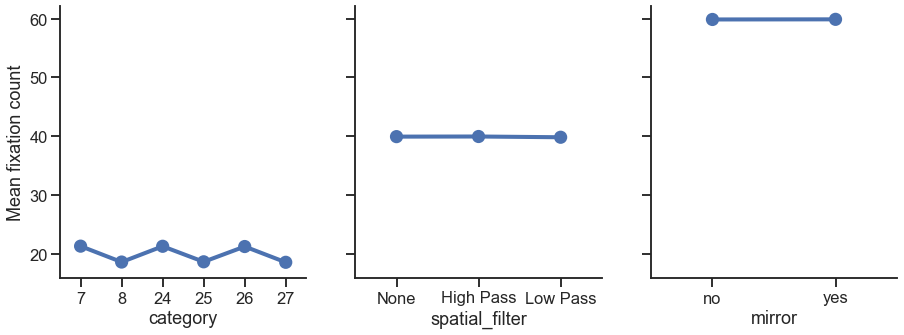

In [27]:
# TODO: Plot mean fixation count across diff conditions
fig1, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)

sns.pointplot(
    data=fix_category,
    x='category',
    y='fix',
    ci='sd',
    ax=ax[0]
)
sns.pointplot(
    data=fix_spatial_filter,
    x='spatial_filter',
    y='fix',
    ci='sd',
    order=['None', 'High Pass', 'Low Pass'],
    ax=ax[1]
)
sns.pointplot(
    data=fix_mirror,
    x='mirror',
    y='fix',
    ci=95,
    ax=ax[2]
)

sns.despine()
ax[0].set(ylabel='Mean fixation count')
ax[1].set(ylabel='')
ax[2].set(ylabel='')


plt.show()

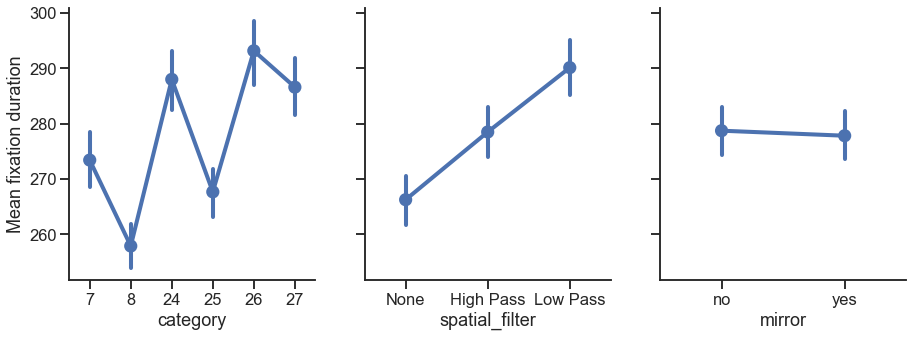

In [28]:
# TODO: Plot mean fixation count across diff conditions
fig1, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)

sns.pointplot(
    data=fix_category,
    x='category',
    y='duration',
    ci=68,
    ax=ax[0]
)
sns.pointplot(
    data=fix_spatial_filter,
    x='spatial_filter',
    y='duration',
    ci=68,
    order=['None', 'High Pass', 'Low Pass'],
    ax=ax[1]
)
sns.pointplot(
    data=fix_mirror,
    x='mirror',
    y='duration',
    ci=68,
    ax=ax[2]
)

sns.despine()
ax[0].set(ylabel='Mean fixation duration')
ax[1].set(ylabel='')
ax[2].set(ylabel='')


plt.show()

### Statistical analysis
Looking at the visual analysis, it seems like there are some differences in fixation duration and number of fixations with respect to the different categories of visual stimuli, spatial_filter and mirroring. First of all, we have to formulate our hypothesis:

Number of fixations: <br>
$H_0$: There *is no* difference in number of fixation across the 3 different spatial_filters used on the stimuli and mirror  <br>
$H_1$: There *is* a difference in number of fixation across the 3 different spatial_filters used on the stimuli and mirror  <br>

Fixation duration: <br> 
$H_0$: There *is no* difference in fixation duration across the 3 different spatial_filters used on the stimuli and mirror <br>
$H_1$: There *is* a difference in fixation duration across the 3 different spatial_filters used on the stimuli and mirror  <br>

Test our hypothesis regarding fixation duration and number of fixations using ANOVA. Since we are dealing with multiple fixations per subject, we have to use a [repeated measure ANOVA](https://www.statsmodels.org/devel/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM).

In [33]:
# TODO: Repeated measure ANOVA testing hypothesis 'fixation number' 
# with spatial_filter and mirror as within subject factors
tmpdf = (
    df_cleaned
    .query('is_outlier==0')
    .groupby(['SUBJECTINDEX', 'trial', 'spatial_filter', 'mirror'])
    .fix
    .count()
    .reset_index()
)

result1 = AnovaRM(
   tmpdf, 
    'fix', 'SUBJECTINDEX', 
    within=['spatial_filter', 'mirror'], 
    aggregate_func='mean'
).fit()
result1.summary()

,F Value,Num DF,Den DF,Pr > F
spatial_filter,104.9191,2.0000,92.0000,0.0000
mirror,0.1556,1.0000,46.0000,0.6951
spatial_filter:mirror,0.2519,2.0000,92.0000,0.7778


In [34]:
# TODO: Repeated measure ANOVA testing hypothesis 'fixation duration' 
# with spatial_filter and mirror as within subject factors
tmpdf = (
    df_cleaned
    .query('is_outlier==0')
    .groupby(['SUBJECTINDEX', 'trial', 'spatial_filter', 'mirror'])
    .duration
    .mean()
    .reset_index()
)

result1 = AnovaRM(
   tmpdf, 
    'duration', 'SUBJECTINDEX', 
    within=['spatial_filter', 'mirror'], 
    aggregate_func='mean'
).fit()
result1.summary()

,F Value,Num DF,Den DF,Pr > F
spatial_filter,63.0632,2.0000,92.0000,0.0000
mirror,0.8170,1.0000,46.0000,0.3708
spatial_filter:mirror,1.7316,2.0000,92.0000,0.1827


## Position of fixations over time
Previously, we analyzed the number and duration of fixations; but so far we didn't care about the timing of fixations.

In this section we are interested in the position of the fixations on the screen wrt to time.  

- Separate the data into 6 bins according to the fixation onset. Bin no. 0 contains all fixations that have an onset in the intervall $[0,1)$ sec, bin no. 1 contains all fixations that have an onset in the intervall $[1,2)$ sec, and so on. Add a column ```time_bin```to the data frame which denotes the bin of each fixation with respect to fixation onset. Form the bins by using the // python operator on the `start` column to create 1sec bins

- Create another column `x_normed` which is the normalized position of the fixation wrt to the screen pixels. <br>
$ x\_normed = (x - 1280/2)/1280 $ <br>
where 1280 is the resolution of the screen in the horizontal direction

In [ ]:
# TODO: Add column "bin" to dataframe
df_cleaned = df_cleaned.query('is_outlier==0')
df_cleaned.loc[:, "time_bin"] = df_cleaned.loc[:, "start"]//1000

# TODO: Add column "x_normed" to dataframe
df_cleaned['x_normed'] = (df_cleaned.x - 640)/1280

## Leftward Bias of fixations

<div class="alert alert-block alert-info">
As you may know from neuroscience lectures on the visual system, there is a phenomenon called <b>leftward bias</b>, meaning that humans tend to make more fixations in the left visual field during the first second after stimulus onset. A study by <a href="https://doi.org/10.1167/16.11.8">Afsari et al.</a> characterizes the leftward bias as a dynamic property that can be modulated, for instance by habitual reading direction. Take a look at the paper if you are interested.
</div>


We want to check whether we can find a leftward bias in our dataset as well. Since it is known that the leftward bias occurs during the first second after stimulus onset, we will take advantage of the binning with respect to fixation onset which we did before.

- Calculate the median `x_normed` wrt to each subject, handedness and time_bin.

- Make a [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html): The x-axis represents the normalised x coordinate (horizontal direction) of fixations and the y-axis the time segment with respect to fixation onset. The points represent the median horizontal fixation location for each time_bin.

- Add confidence intervals of 95% around each point. Tipp: The keyword argument ```ci``` may help.

- Add a [vertical line](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html) representing the center of the visual field. 

Compare the tendencies of horizontal fixation locations among the different time segments. can you see biases in the horizontal direction for handedness? It's quite interesting, wouldn't you say!

In [ ]:
# TODO: Point plot of tendencies of horizontal fixation locations in each time bin and handedness
fig, ax = plt.subplots(figsize=(5,10))
tmpdf = (
    df_cleaned
    .groupby(['SUBJECTINDEX', 'handedness', 'time_bin'])
    ['x_normed']
    .median()
    .reset_index()
)

sns.pointplot(
    data=tmpdf, 
    x="x_normed", 
    y="time_bin", 
    hue='handedness',
    orient="h", 
    ci=95, 
    dodge=0.2,
    join=False,
    ax=ax
)
ax.axvline(0, ls=':', color='r')
ax.set(xlim=(-0.1, 0.1), ylim=(-1,6));

Repeat the above analysis for median horizontal location of fixations for each spatial_filter and time_bin. Do you see anything interesting here?

In [ ]:
# TODO: Point plot of tendencies of horizontal fixation locations in each time bin and spatial filter
fig, ax = plt.subplots(figsize=(5,10))
tmpdf = (
    df_cleaned
    .groupby(['SUBJECTINDEX', 'spatial_filter', 'time_bin'])
    ['x_normed']
    .median()
    .reset_index()
)
sns.pointplot(
    kind='point',
    data=tmpdf, 
    x="x_normed", 
    y="time_bin", 
    hue='spatial_filter',
    orient="h", 
    ci=95, 
    dodge=0.2,
    join=False,
    ax=ax
)
ax.axvline(0, ls=':', color='r')
ax.legend(frameon=False, title='spatial filter')
ax.set(xlim=(-0.1, 0.1), ylim=(-1,6));

# BONUS
Up until now, we've looked at eye tracking data in a rather stationary way by analyzing the number of occurences, the duration, the timing and the location of fixations with respect to different visual stimuli. Taking together all this data, we can actually reconstruct someones viewing pattern; that's one of the really cool things about eye tracking. In the following, we will exploit the spatial and temporal information that is revealed by looking at dynamic sequences of fixations rather than at individual fixation points.

## Heat map

<div class="alert alert-block alert-info">
    A <b>heat map</b> can be interpreted as an indicator of how salient different regions of a visual stimulus are. A heat map shows how often certain parts of a visual stimulus are fixated.
</div>

Here's an example of a heat map: ![heat map](https://upload.wikimedia.org/wikipedia/commons/5/50/Eyetracking_heat_map_Wikipedia.jpg)

Let's create a heat map for our data. First, we will compute a heat map taking all data points into account, later on we will create individual heat maps for each spatial filter type.

- Since we are interested in the location of fixations, we now need the ```x``` and ```y```coordinates.

- First, remove all fixations that have x-coordinates less than 0 and greater than 1280 and y-coordinates less than 0 and greater than 960. This way we remove stray fixations that might have been recorded outside the screen limits.

- Next, We can use `sns.histplot()` to create 2 dimensional histograms and see which locations in the screen have the most fixations. We've used a colormap called `viridis` to create the heatmap. You can try anyother cmap of your choice! 

In [ ]:
# TODO remove fixations that are outside the screen limits
df_cleaned = df_cleaned.query('x >= 0 and x <= 1280 and y>=0 and y <= 960')

In [ ]:
# TODO: Create a heat map using all data points
fig, axes = plt.subplots(figsize=(12,9))

sns.histplot(
    df_cleaned, x="x", y="y",
    bins=100, cmap='viridis', thresh=None
);

Now that you know how to create a heat map, repeat the procedure described above, this time taking into account the data points of one spatial_filter at a time.

- Generate individual heat maps for each of the stimulus categories. Follow the schema described above. Do **not** copy the code from the previous exercise 3 times but try to find a smarter solution to generate 3 heat maps at a time.

In [ ]:
# TODO: Generate one heat map for each spatial filtering
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40,9))
axes = axes.ravel()
filters = df_cleaned["spatial_filter"].unique()
for index, filt in enumerate(filters):
    sns.histplot(
        df_cleaned.query('spatial_filter == @filt'), 
        x="x", y="y",
        bins=100, cmap='viridis', thresh=None,
        ax=axes[index]
    )
    axes[index].set(title=filt)

plt.show()

<div class="alert alert-block alert-info">
    By studying <b>heat maps</b> we can illuminate where people look and how salient a particular region of the stimulus is, but we still haven't really reconstructuted someones viewing pattern. In order to do so, we need to combine the spatial and temporal information. One way of doing this is called <b>scanpath</b>.
</div>

## Scanpath

<div class="alert alert-block alert-info">
    The idea of a <b>scanpath</b> is to follow fixation points in a chronological order, revealing when and where people direct their gaze. A scanpath exploits and visualizes both spatial and temporal information in the eye tracking data. In this way, scanpaths can provide insight into cognitive intent and attention of the viewer, as well as salience of the visual stimulus.
</div>

Finally, we want to reconstruct a subject's viewing behavior. We would like to know whether distinct viewing patterns are associated with images of each of the respective spatial filtering methods. For each spatial filters, an example image is given below, the paths to the respective image files are stored in the dictionary ```images```. The data associated with each image for subject 24 is stored in the variable ```trial```. Use that data in order to reconstruct a scanpath for each spatial filter category. Follow the steps outlined below:

- Plot the image which is associated with the selected trial. The images are available in the ./et_data folder. The dictionary ```images``` contains the file paths for each spatial filter. Tipp: Use [```imread()```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html) and [```imshow()```](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) with the keyword arguments ```aspect='auto'```, ```extent=(0,1280,0,960)``` and ```alpha=0.5```.
- Plot fixation points using a [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). Make sure to visually discriminate the chronological order and the duration of fixations. Tipp: Take a look at the keyword arguments ```hue``` and ```size``` and look for appropiate attributes in the data frame.
- Draw saccade paths by interpolating fixation points. The function [```arrow()```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.arrow.html) may be helpful.
- The background image, fixation points and saccade paths are supposed to be superimposed on each other (all in one plot), this can be done by explicitly calling the same axes object for several plotting operations.

In [ ]:
filters = ['None', 'High Pass', 'Low Pass',]
# images = {'None':'Stimuli_7/23.png', 'High Pass':'Stimuli_24/23.png', 'Low Pass':'Stimuli_26/23.png',}

image_urls = {
    'None': 'https://github.com/ashimakeshava/ACC_SS2021/blob/main/Tutorials/Day-03/et_data/Stimuli_7/23.png?raw=true',
    'High Pass': 'https://github.com/ashimakeshava/ACC_SS2021/blob/main/Tutorials/Day-03/et_data/Stimuli_24/23.png?raw=true',
    'Low Pass': 'https://github.com/ashimakeshava/ACC_SS2021/blob/main/Tutorials/Day-03/et_data/Stimuli_26/23.png?raw=true',
}


file_numbers = {'None': 23, 'High Pass':23, 'Low Pass': 23}
subject = 24

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(36,9))

ax = ax.ravel()

for index, filt in enumerate(filters):
    
    trial = df_cleaned[(df_cleaned["SUBJECTINDEX"]==subject) & (df_cleaned["spatial_filter"]==filt) &
              (df_cleaned["filenumber"]==file_numbers[filt])]
    
    f = urllib.request.urlopen(image_urls[filt]) # establish url to fetch image
    b = BytesIO(f.read()) # open data stream to read image
    image = Image.open(b) # Open stream as image
    
    # TODO: Reconstruct scanpaths for each stimulus category

    # Plot background image
    ax[index].imshow(image, aspect="auto", extent=(0,1280,0,960), alpha=0.5) 
    
    # Plot fixation points
    
    scat = sns.scatterplot(
        x='x', y='y', hue='time_bin', 
        size='duration', 
        sizes=(50, 500), 
        data=trial, 
        palette='viridis', 
        ax=ax[index]
    )
    
    # Draw saccade paths by interpolating fixation points
    coordinates_start = list(zip(trial["x"], trial["y"]))
    coordinates_end = coordinates_start[1:]
    
    for i in range(len(coordinates_end)):
        start_x = coordinates_start[i][0]
        start_y = coordinates_start[i][1]
        end_x = coordinates_end[i][0]
        end_y = coordinates_end[i][1]
        ax[index].arrow(
            start_x, start_y, end_x-start_x, end_y-start_y, 
            fill=True, shape='full', width=2, head_width=0.1, 
            head_starts_at_zero=False, overhang=0, color = 'red', 
            alpha = 0.9, zorder = 0
        )
    ax[index].set_title(filt)
        
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
    Keep in mind that the scanpaths associated with each of the three images above cannot be generalized to the three filter categories, since we only reconstructed the scanpaths of one participant for one image per category. Averaging over all participants and all images of the four stimulus categories would potentially allow to reveal discriminative effects of the spatial filter on fixation patterns. 
</div>

# Summary - What you have learned about eye tracking
Congratulations, you've mastered the eye tracking chapter! By now you should be familiar with the following concepts:
* Studying overt visual attention with eye tracking
* Cleaning eye tracking data
* Analyzing fixations and saccades
* Creating a heat map
* Reconstructing a scanpath

# Further reading
If you want to learn more about eye tracking, the following book offers an exhaustive source of information. *You can find it in the file section of this course, in the folder "Background Literature".*
- A.T. Duchowski (2017): Eye Tracking Methodology. Springer International Publishing AG , DOI 10.1007/978-3-319-57883-5_1

# Citations
- Wilming N, Onat S, Ossandón J, Acik A, Kietzmann TC, Kaspar K, Gameiro RR, Vormberg A, König P (2017) An extensive dataset of eye movements during viewing of complex images. Scientific Data 4: 160126. https://doi.org/10.1038/sdata.2016.126  
- Wilming N, Onat S, Ossandón J, Acik A, Kietzmann TC, Kaspar K, Gameiro RR, Vormberg A, König P (2017) Data from: An extensive dataset of eye movements during viewing of complex images. Dryad Digital Repository. https://doi.org/10.5061/dryad.9pf75
- Leys, C., et al., Detecting outliers: Do not use standard deviation around the mean, use absolute deviation around the median, Journal of Experimental Social Psychology (2013). http://dx.doi.org/10.1016/j.jesp.2013.03.013
- Afsari, Z., Ossandón, J. P., & König, P. (2016). The dynamic effect of reading direction habit on spatial asymmetry of image perception. Journal of Vision, 16(11):8, 1–21. https://doi.org/10.1167/16.11.8